<h3 <b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 <b>Домашнее задание. Продвинутый поток.</b></h3>

#### Тема: Решение задачи прогноза оттока клиентов телеком компании.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.



# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle competitions download -c advanced-dls-spring-2021

  0% 0.00/14.4k [00:00<?, ?B/s]
100% 14.4k/14.4k [00:00<00:00, 5.56MB/s]
  0% 0.00/213k [00:00<?, ?B/s]
100% 213k/213k [00:00<00:00, 67.2MB/s]
  0% 0.00/648k [00:00<?, ?B/s]
100% 648k/648k [00:00<00:00, 89.7MB/s]


In [5]:
data = pd.read_csv('./train.csv')

In [6]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [7]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [9]:
data = data.applymap(lambda x: np.nan if type(x) == str and x.strip() == '' else x)


In [10]:
# Количество nan в каждой колонке
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [11]:
# В стобце TotalSpent 9 пропусков  - отбросим их

In [12]:
data = data.dropna()
data.shape

(5273, 20)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.


In [13]:
%matplotlib inline

In [14]:
data[num_cols].head()

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.2
2,1,75.90,75.9
3,32,79.30,2570
4,60,115.25,6758.45


In [15]:
data[num_cols].dtypes 

ClientPeriod         int64
MonthlySpending    float64
TotalSpent          object
dtype: object

In [16]:
# преобразуем значение в столбце TotalSpent к типу float
data[num_cols[2]] = data[num_cols[2]].astype(float)

In [22]:
# Распределение численных признаков

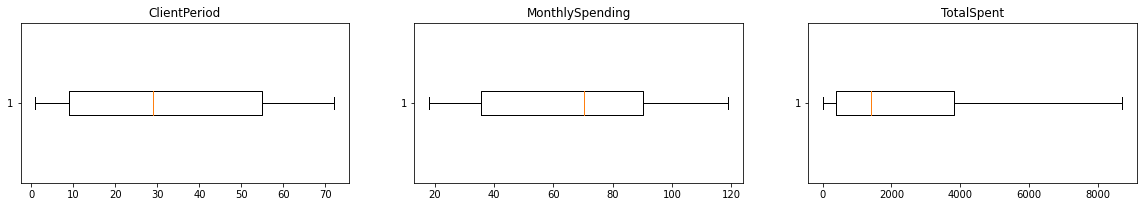

In [23]:
nl = len(num_cols)
plt.figure(figsize = [20,10])
for i,name in enumerate(num_cols):
    plt.subplot(nl,3,i+1)
    plt.boxplot(data[name],vert = False)
    plt.title(name)


In [24]:
# Распределение категориальных признаков

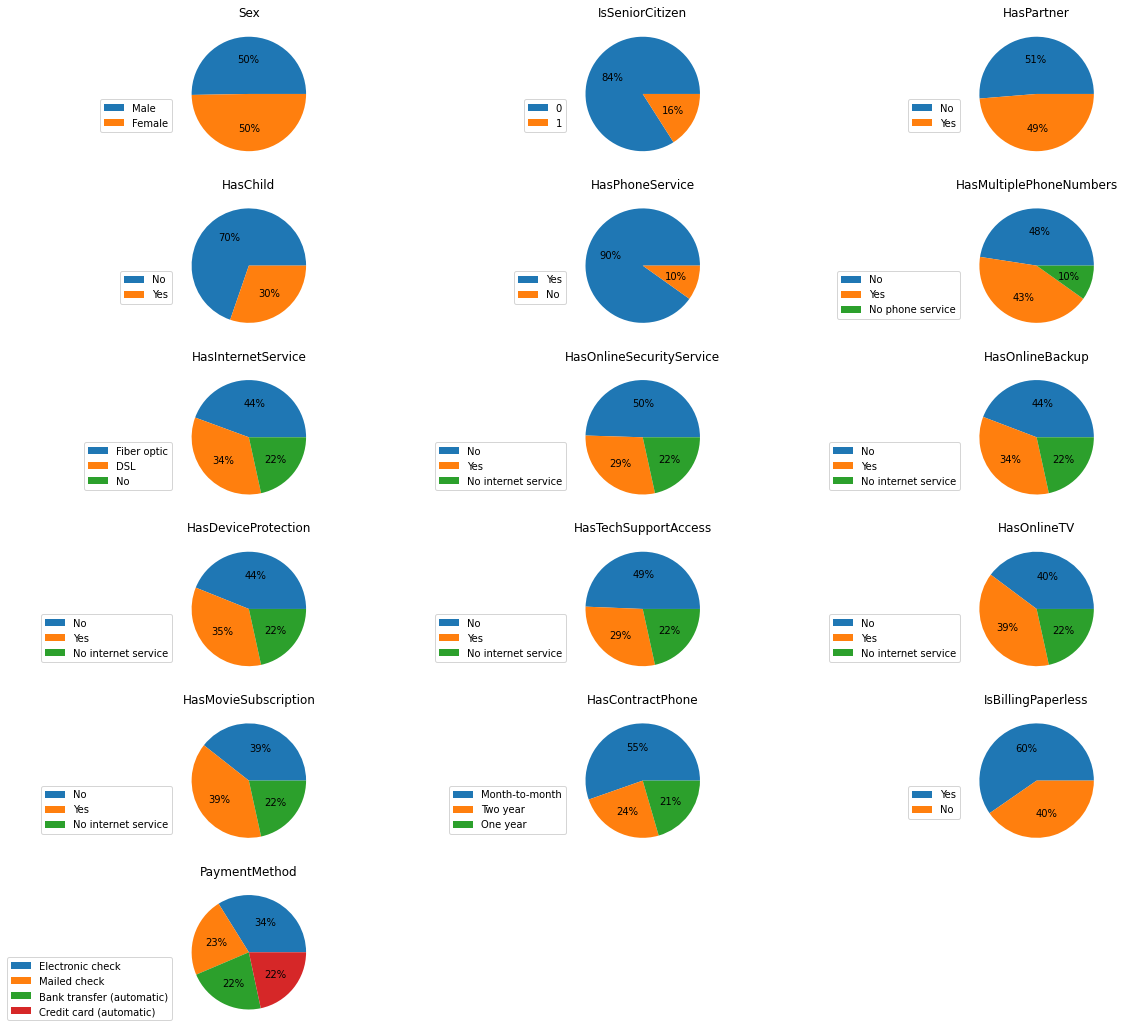

In [25]:
cl = len(cat_cols)
plt.figure(figsize = [20,50])
for i,name in enumerate(cat_cols):
    plt.subplot(cl,3,i+1)
    vc = data[name].value_counts()
    plt.pie(vc,autopct='%1.0f%%')
    plt.legend(vc.keys(),loc='best', bbox_to_anchor=(0, 0, 0, 0.5))
    plt.title(name)

In [26]:
# Целевая переменная

Text(0.5, 1.0, 'Churn')

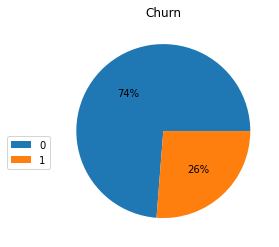

In [27]:
vc = data[target_col].value_counts()
plt.pie(vc,autopct='%1.0f%%')
plt.legend(vc.keys(),loc='best', bbox_to_anchor=(0, 0, 0, 0.5))
plt.title(target_col)

In [28]:
# Видим, что классы не сбалансированы

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 


In [18]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [41]:
sc = StandardScaler()

numeric_data = pd.DataFrame(sc.fit_transform(data[num_cols]),columns=num_cols,index=data.index)

categorial_data = data[cat_cols]

numeric_data.shape , categorial_data.shape

((5273, 3), (5273, 16))

In [42]:
dummy_features = pd.get_dummies(categorial_data)
dummy_features.shape

(5273, 42)

In [47]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.919099,-1.506436,-0.557582,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,1.612060,-1.295997,-0.184763,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,-1.282072,0.362658,-0.976504,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,-0.018437,0.475334,0.122800,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,1.122911,1.666716,1.968909,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0


In [44]:
y = data[target_col]

In [45]:
X.shape, y.shape

((5273, 45), (5273,))

In [ ]:
# Обучим классификатор

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression

In [105]:
Cs = range(1,15)

model = LogisticRegressionCV(Cs=Cs,scoring='roc_auc',refit = True,cv = 5,verbose=5)
# model = LogisticRegression(C=1)
model.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.0s finished


LogisticRegressionCV(Cs=range(1, 15), class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True,
                     scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=5)

In [106]:
model.C_ # отпимальный параметр С

array([5])

In [107]:
y_train_predicted = model.predict_proba(X_train)[:, 1]
y_test_predicted = model.predict_proba(X_test)[:, 1]

In [99]:
from sklearn.metrics import roc_auc_score, roc_curve

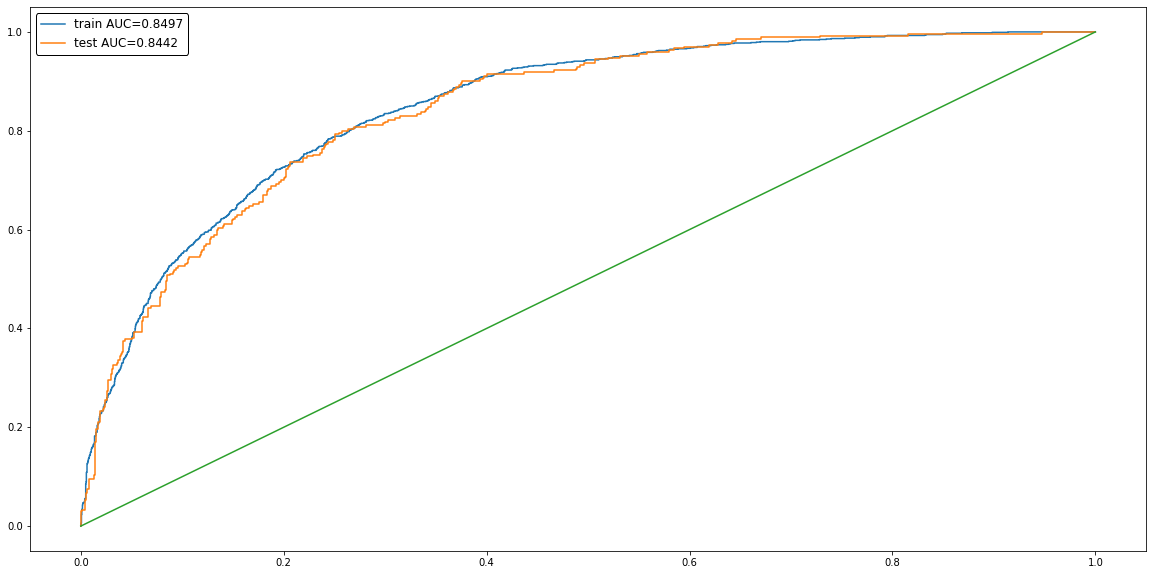

In [108]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

**Test AUC = 0.8442  при С = 5**

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров и выберите лучшую модель по метрике ROC-AUC. 



In [ ]:
!pip install catboost

In [111]:
import catboost 

In [131]:
cat_indexes = [data.columns.get_loc(name) for name in cat_cols]
num_indexes = [data.columns.get_loc(name) for name in num_cols]


([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], [0, 1, 2])

In [123]:
X_train_origin, X_test_origin, _, _ = train_test_split(data.iloc[:, :-1].values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [141]:
boosting_model = catboost.CatBoostClassifier(n_estimators=150, 
                                             cat_features=cat_indexes,verbose=0)

In [145]:
# Найдем оптимальное количество решающих деревьев с попомщью GridSearchCV
grid_cv = GridSearchCV(boosting_model,{'n_estimators':np.arange(20,500,20)},scoring='roc_auc',verbose=1,n_jobs=4)
grid_cv.fit(X_train_origin, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   28.8s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:  6.0min finished
Custom logger is already specified. Specify more than one logger at same time is not thread safe.

GridSearchCV(cv=None, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fe8ffec47d0>,
             iid='deprecated', n_jobs=4,
             param_grid={'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240, 260,
       280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [150]:
grid_cv.best_params_,grid_cv.best_score_ #оптимальное количество деревьвев + значение ROC AUC на нем.

({'n_estimators': 140}, 0.8461607628043266)

In [151]:
y_train_predicted = grid_cv.best_estimator_.predict_proba(X_train_origin)[:, 1]
y_test_predicted = grid_cv.best_estimator_.predict_proba(X_test_origin)[:, 1]

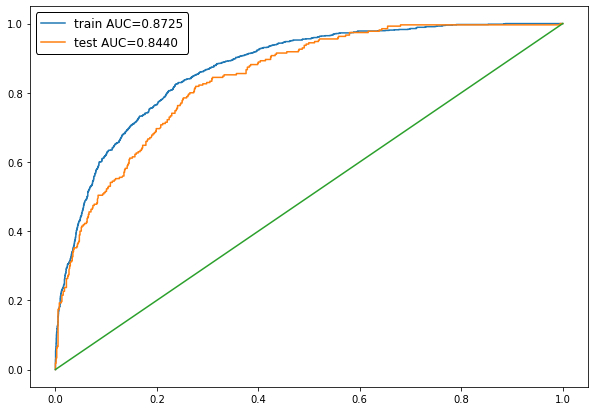

In [152]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Бустинг не дал прироста точности на тестовых данных.

**Test AUC = 0.8440  при С = 140**


# Предсказания

In [ ]:
# протестируем модели на тестовых данных с Каггла

In [153]:
#  Логистическая регрессия
best_model = model
best_model

LogisticRegressionCV(Cs=range(1, 15), class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True,
                     scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=5)

In [206]:
# предобработка тестовых данных для логистической регрессии:
X_test = pd.read_csv('./test.csv')

# TotalSpent переводим во float и заполняем пропуски средним 
bad_idxes = X_test[X_test["TotalSpent"]==" "].index
good_idxes = X_test.index.drop(bad_idxes)
  
X_test['TotalSpent'][good_idxes] = X_test['TotalSpent'][good_idxes].astype(float)
X_test['TotalSpent'][bad_idxes] = X_test['TotalSpent'][good_idxes].mean()

sc = StandardScaler()

numeric_data = pd.DataFrame(sc.fit_transform(X_test[num_cols]),columns=num_cols,index=X_test.index)
categorial_data = X_test[cat_cols]
dummy_features = pd.get_dummies(categorial_data)

X_test_formated = pd.concat([numeric_data, dummy_features], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [222]:
submission = pd.read_csv('./submission.csv')

submission['Churn'] =  best_model.predict_proba(X_test_formated)[:,1]
submission.to_csv('./my_submission1.csv',index=False)
# Kaggle score: 0.84538

In [ ]:
# Загрузим на кагл решение катбустингом

In [229]:
X_test = pd.read_csv('./test.csv')

submission = pd.read_csv('./submission.csv')

submission['Churn'] =  grid_cv.best_estimator_.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission2.csv',index=False)
# Kaggle score: 0.85016

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов
